In [1]:
test_result_dir = '../test_results'

import os
files = os.listdir(test_result_dir)
files

['smq_0000000001000.json',
 'smq_0000000001000_receive.json',
 'smq_0000000001000_send.json',
 'smq_0000000010000.json',
 'smq_0000000010000_receive.json',
 'smq_0000000010000_send.json',
 'smq_0000000100000.json',
 'smq_0000000100000_receive.json',
 'smq_0000000100000_send.json',
 'smq_0000001000000.json',
 'smq_0000001000000_receive.json',
 'smq_0000001000000_send.json',
 'smq_0000010000000.json',
 'smq_0000010000000_receive.json',
 'smq_0000010000000_send.json',
 'smq_0000100000000.json',
 'smq_0000100000000_receive.json',
 'smq_0000100000000_send.json',
 'smq_0001000000000.json',
 'smq_0001000000000_receive.json',
 'smq_0001000000000_send.json',
 'smq_0010000000000.json',
 'smq_0010000000000_receive.json',
 'smq_0010000000000_send.json',
 'standard_0000000001000.json',
 'standard_0000000001000_receive.json',
 'standard_0000000001000_send.json',
 'standard_0000000010000.json',
 'standard_0000000010000_receive.json',
 'standard_0000000010000_send.json',
 'standard_0000000100000.json'

In [2]:
from performance_test_base import package_sizes

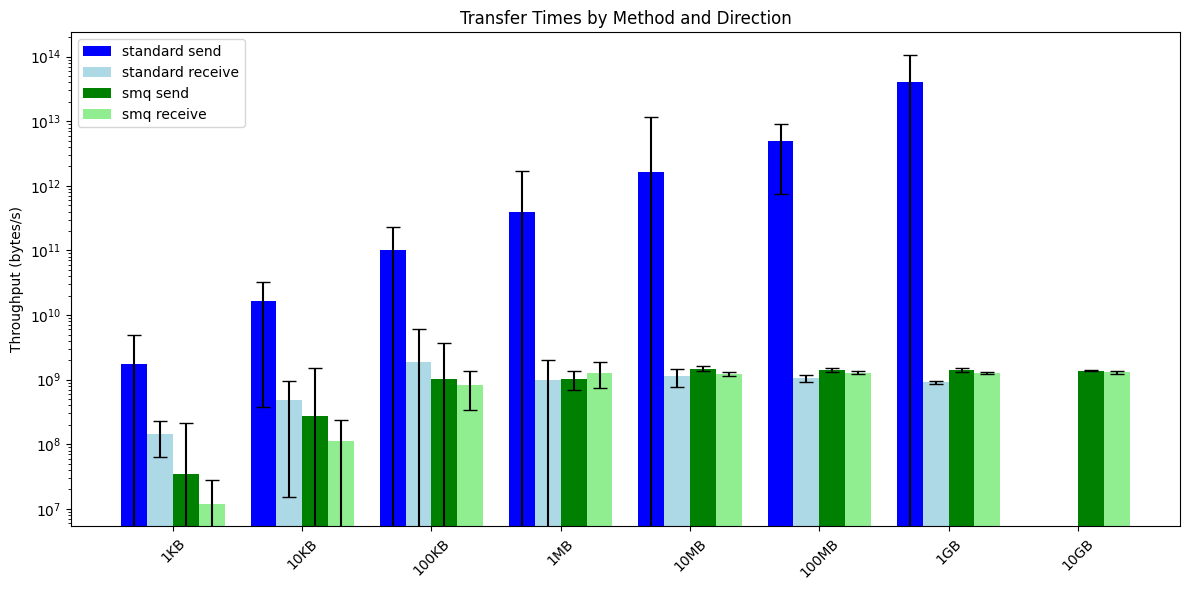

In [3]:
import json
import numpy as np
import matplotlib.pyplot as plt

labels = [
    f"{s}B" if s < 1_000 else f"{s//1000}KB" if s < 1_000_000 else f"{s//1_000_000}MB" if s < 1_000_000_000 else f"{s//1_000_000_000}GB"
    for s in package_sizes
]

types = ['standard', 'smq']
directions = ['send', 'receive']
data = {f'{t}_{d}': [] for t in types for d in directions}
errors = {f'{t}_{d}': [] for t in types for d in directions}

for size in package_sizes:
    size_str = f'{size:013d}'
    for t in types:
        for d in directions:
            key = f'{t}_{d}'
            filename = f"{t}_{size_str}_{d}.json"
            path = os.path.join(test_result_dir, filename)
            if os.path.isfile(path):
                with open(path) as f:
                    stats = json.load(f)
                    mean = stats['mean']
                    median = stats['median']
                    std = stats['std']
                    min_ = stats['min']
                    max_ = stats['max']

                    throughput = size / mean
                    # Error propagation: σ(v) = (Δx / x^2) * σ(t)
                    error = (size / mean**2) * std
                    data[key].append(throughput)
                    errors[key].append(error)
            else:
                data[key].append(np.nan)
                errors[key].append(0)

x = np.arange(len(package_sizes))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))

for i, (label, color) in enumerate(zip(data.keys(), ['blue', 'lightblue', 'green', 'lightgreen'])):
    ax.bar(x + (i - 1.5)*width, data[label], width, yerr=errors[label], label=label.replace('_', ' '), capsize=5, color=color)

ax.set_ylabel('Throughput (bytes/s)')
ax.set_xticks(x)
ax.set_yscale('log')
ax.set_xticklabels(labels, rotation=45)
ax.set_title('Transfer Times by Method and Direction')
ax.legend()
plt.tight_layout()
plt.show()

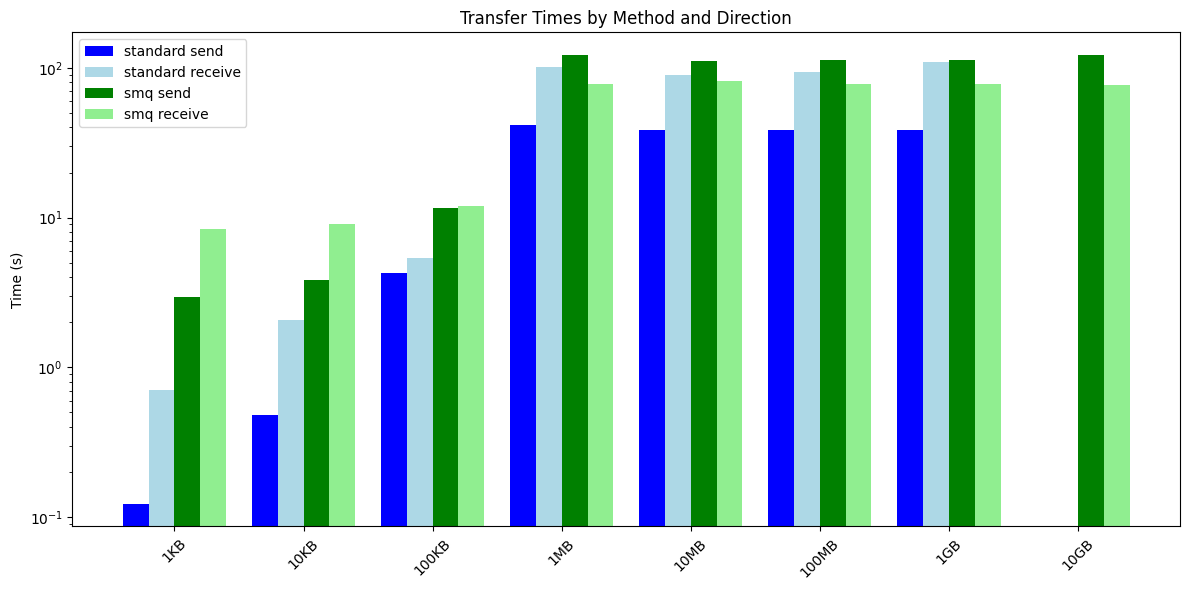

In [12]:
import json
import numpy as np
import matplotlib.pyplot as plt

labels = [
    f"{s}B" if s < 1_000 else f"{s//1000}KB" if s < 1_000_000 else f"{s//1_000_000}MB" if s < 1_000_000_000 else f"{s//1_000_000_000}GB"
    for s in package_sizes
]

types = ['standard', 'smq']
directions = ['send', 'receive']
data = {f'{t}_{d}': [] for t in types for d in directions}


for size in package_sizes:
    size_str = f'{size:013d}'
    for t in types:
        
        filename = f"{t}_{size_str}.json"
        path = os.path.join(test_result_dir, filename)
        if os.path.isfile(path):
            with open(path) as f:
                stats = json.load(f)
                sent = stats['time_sent']
                received = stats['time_receive']

                data[f'{t}_send'].append(sent)
                data[f'{t}_receive'].append(received)
        else:
            data[f'{t}_send'].append(np.nan)
            data[f'{t}_receive'].append(np.nan)

x = np.arange(len(package_sizes))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))

for i, (label, color) in enumerate(zip(data.keys(), ['blue', 'lightblue', 'green', 'lightgreen'])):
    ax.bar(x + (i - 1.5)*width, data[label], width, label=label.replace('_', ' '), capsize=5, color=color)

ax.set_ylabel('Time (s)')
ax.set_xticks(x)
ax.set_yscale('log')
ax.set_xticklabels(labels, rotation=45)
ax.set_title('Transfer Times by Method and Direction')
ax.legend()
plt.tight_layout()
plt.show()